In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [6]:
img  = cv2.imread('car.png',0)
img

array([[177, 177, 177, ..., 134, 133, 133],
       [177, 177, 177, ..., 134, 133, 133],
       [177, 177, 177, ..., 134, 133, 133],
       ...,
       [162, 156, 152, ..., 148, 149, 147],
       [165, 159, 154, ..., 147, 146, 145],
       [172, 166, 160, ..., 149, 147, 146]], dtype=uint8)

In [7]:
img[3,1] == 177

True

In [9]:
def wind(image):
    cv2.namedWindow("image",cv2.WINDOW_NORMAL)
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [12]:
wind(img)

In [13]:
img_color  = cv2.imread('car.png',1)

In [14]:
img_1 = deepcopy(img_color)
circle  = cv2.circle(img_1,(20,40),400,(0,255,0),10)

In [15]:
wind(circle)

In [16]:
img  = cv2.imread('G:\Education\Image Processing using opencv\difference.png',1)
def wind2(image):
    cv2.namedWindow("image",cv2.WINDOW_NORMAL)
    cv2.imshow("image",image)
    cv2.waitKey(10000)
    cv2.destroyAllWindows()

In [17]:
wind2(img)

In [112]:
img2  = cv2.imread('G:\Education\Image Processing using opencv\difference.png',1)

In [107]:
img3 = deepcopy(img2)
def clicktocircle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img2,(x,y),50,(255,0,0),4)
cv2.namedWindow('diff',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('diff',clicktocircle)

while True:
    cv2.imshow('diff',img2)
    a = cv2.waitKey(200)
    #print (2)
    #ASCII for ESC:27
    if a==27:
        break
cv2.destroyAllWindows()

### Splitting Channels and map algebra

Channels are the 3 bands used by the camera to to capture 3 spectrums of light(red,blue,green).

In [32]:
b,g,r = cv2.split(img)

In [33]:
wind(b)

In [34]:
image_merged = cv2.merge((b,g,r))

In [35]:
wind(image_merged)

### Resizing cropping and exporting

In [36]:
image_resize = cv2.resize(img,dsize = None,fx = 0.2,fy=0.2,interpolation = cv2.INTER_CUBIC)

In [37]:
cv2.imshow('window',image_resize)
cv2.waitKey(1000)
cv2.destroyAllWindows

<function destroyAllWindows>

In [38]:
cropped = image_resize[40:100,50:150]

In [39]:
wind2(cropped)

### Geometric operation on images

In [40]:
crops = cv2.imread("crops.png",0)

In [31]:
cv2.imshow('window',crops)
cv2.waitKey(10000)
cv2.destroyAllWindows

<function destroyAllWindows>

In [24]:
sobelx = cv2.Sobel(crops,cv2.CV_8U,0,1,ksize =3)

In [25]:
wind(sobelx)

In [27]:
laplacian = cv2.Laplacian(crops,cv2.CV_8U)
wind(laplacian)

In [32]:
#Edge and feature detection

In [56]:
#Canny Edge detection
#Strong edges : grdient more than the max threshold
#weak edge : gradient more than the min edge
edges = cv2.Canny(crops,100,200)

In [57]:
wind(edges)

In [59]:
basketball_img = cv2.imread('basketball.jpg',1)
wind(basketball_img)

In [66]:
edges_new = cv2.Canny(basketball_img,100,400)
wind(edges_new)

In [67]:
lines = cv2.HoughLines(edges_new,1,np.pi/180,200)


In [68]:
lines.shape

(14, 1, 2)

In [75]:
for i in lines:
    rho = i[0][0]
    theta = i[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho*a
    y0 = rho*b
    x1 = int(x0 +1000*(-b))
    y1 = int(y0 + 1000*(-a))
    x2 = int(x0 -1000*(-b))
    y2=int(y0-1000*(-a))                
    cv2.line(basketball_img,(x1,y1),(x2,y2),(0,0,255),2)

In [76]:
wind(basketball_img)

In [113]:
diffs = np.array([[538,109],[1203,739],[737,157]])

In [114]:
def  euclid(x1,x2,y1,y2):
    return int(np.sqrt((x1-x2)**2 +(y1-y2)**2))

In [117]:
imgn= deepcopy(img2)
def clicktocircle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        for diff in diffs:
            if (euclid(diff[0],x1,diff[1],y2)<50):
                cv2.circle(img2,(x,y),50,(255,0,0),4)
cv2.namedWindow('diff',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('diff',clicktocircle)

while True:
    cv2.imshow('diff',imgn)
    a = cv2.waitKey(200)
    #print (2)
    #ASCII for ESC:27
    if a==27:
        break
cv2.destroyAllWindows()

### Radiometric Operations 

Image colorspace and thresholding

In [119]:
hsv = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)

In [120]:
wind(hsv)

In [124]:
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [125]:
wind(gray)

In [126]:
r,t = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

In [127]:
r

100.0

In [128]:
t

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [129]:
wind(t)

In [130]:
lena  = cv2.imread('lena.jpg',0)
wind(lena)

In [136]:
hist = cv2.calcHist([lena],[0],None,[256],[0,256])

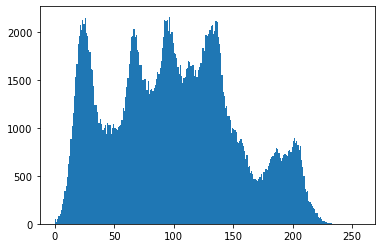

In [141]:
plt.hist(lena.flatten(),256,[0,256])
plt.show()

In [150]:
equ = cv2.equalizeHist(lena) #Steretching the histogram
# hence whites will appear more white and blacks will be more black

In [147]:
diff_lena = np.hstack((lena,equ))
wind(diff_lena)

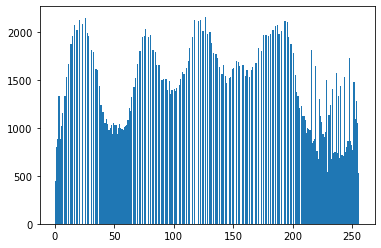

In [148]:
plt.hist(equ.flatten(),256,[0,256])
plt.show()

Convlution based operarations

In [170]:
blur = cv2.blur(lena,(3,3))

In [171]:
wind(blur)

In [172]:
blur_gaussian = cv2.GaussianBlur(lena,(11,11),0)

In [173]:
diff_lena1 = np.hstack((blur,blur_gaussian))
wind(diff_lena1)

K means classification

In [174]:
img_class = cv2.imread("im0.png",1)

In [179]:
imgCL = np.float32(img_class.reshape((-1,3)))
criteria = (cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
k = 4
ret,lab,center = cv2.kmeans(imgCL,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res  = center[lab.flatten()]
res2 = res.reshape((img_class.shape))

In [188]:
wind(res2)

In [ ]:
##End 
## The credit for the code goes to Geo University 